# Visualizing the History of Nobel Prize Winners

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [127]:
# loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('notebook')

# loading data
df = pd.read_csv('nobel.csv')
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

## Analyze Nobel Prize winner data and identify patterns by answering the following questions:

### What is the most commonly awarded gender and birth country?
- Store your answers as string variables `top_gender` and `top_country`.


In [129]:
top_gender = df['sex'].value_counts().index[0]
print(f"Most awarded gender is: {top_gender}")

Most awarded gender is: Male


In [130]:
top_country = df['birth_country'].value_counts().index[0]
print(f"Most awarded country is: {top_country}")

Most awarded country is: United States of America


### Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

- Store this as an integer called `max_decade_usa`.


In [131]:
df['us_winner'] = df['birth_country']=='United States of America'
df['decade'] =  (np.floor(df['year']/10) *10).astype(dtype=int)

In [132]:
group = df.groupby('decade',as_index=False)['us_winner'].mean()
group = group.rename(columns={'us_winner':'us_winners_mean'})

max_decade_usa = group[group['us_winners_mean']== group['us_winners_mean'].max()]
max_decade_usa = int(max_decade_usa['decade'])
print(f"Highest ratio of US-born Nobel Prize winners was in decade: {max_decade_usa}")

Highest ratio of US-born Nobel Prize winners was in decade: 2000


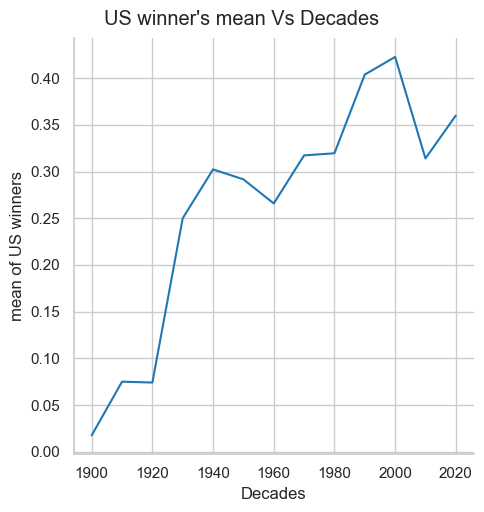

In [133]:
ax = sns.relplot(x='decade',y='us_winners_mean',data=group,kind='line')
ax.set(xlabel='Decades',ylabel='mean of US winners')
ax.fig.suptitle("US winner's mean Vs Decades",y=1.02)
plt.show()

### Which decade and Nobel Prize category combination had the highest proportion of female laureates?

- Store this as a dictionary called `max_female_dict` where the decade is the key and the category is the value. There should only be one `key:value` pair.

In [134]:
df['is_female'] = df['sex']=='Female'
group_decade = df.groupby(['decade','category'],as_index=False)['is_female'].mean()

highest_decade = group_decade[group_decade['is_female'] == group_decade['is_female'].max()]
highest_decade = highest_decade[['decade', 'category']]

max_female_dict = {highest_decade['decade'].values[0]:highest_decade['category'].values[0]}
print(f"Highest proportion of female laureates: {max_female_dict}")

Highest proportion of female laureates: {2020: 'Literature'}


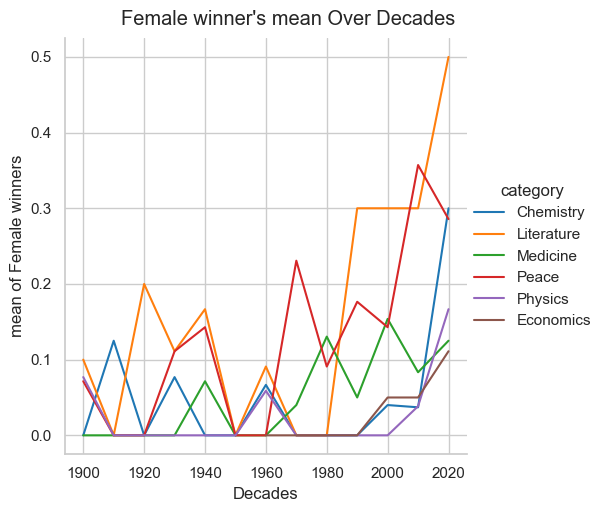

In [135]:
ax = sns.relplot(x='decade',y='is_female',data=group_decade,kind='line',hue='category')
ax.set(xlabel='Decades',ylabel='mean of Female winners')
ax.fig.suptitle("Female winner's mean Over Decades",y=1.02)
plt.show()

### Who was the first woman to receive a Nobel Prize, and in what category?

- Save your string answers as `first_woman_name` and `first_woman_category`.

In [136]:
first_woman_nobel = df[df['sex']=="Female"].sort_values(by='year',ascending=True).head(1)
first_woman_name=str(first_woman_nobel['full_name'].values[0])
first_woman_category=str(first_woman_nobel['category'].values[0])

print(f"First woman to receive Nobel Prize was: {first_woman_name}, in category: {first_woman_category}")

First woman to receive Nobel Prize was: Marie Curie, née Sklodowska, in category: Physics


### Which individuals or organizations have won more than one Nobel Prize throughout the years?

- Store the full names in a list named `repeat_list`.

In [137]:
counts = df['full_name'].value_counts(sort=True)
counts = counts[counts>1]
repeat_list = list(counts.index)

print("More than one Nobel Prize winners:")
print(repeat_list)

More than one Nobel Prize winners:
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
